## **DETECCIÓN DE CÁNCER A TRAVÉS DE IMÁGENES DERMATOSCÓPICAS USANDO TÉCNICAS DE DEEP LEARNING**

En este notebook aprenderemos no sólo a entrenar un modelo de forma satisfactoria, sino la importancia de aplicar distintas técnicas como el aumento de datos, la adición de capas, el Dropout,la reducción de la tasa de aprendizaje, la extracción de caraterísticas y el ajuste fino a la hora de entrenar nuestra red para reducir  el sobreajuste y conseguir una mayor precisión de clasificación.


Entrenaremos tres modelos en total. En este proceso, se observará un aumento de complejidad y precisión entre modelo y modelo. La primera es una convnet entrenada desde cero muy sencilla con pocas capas y sin aumento de datos. La segunda es una ampliación de la primera a la que añadiremos más capas convolucionales y más capas Dropout,además de reducción de tasa de aprendizaje como callback y la técnica de aumento de Datos. Finalmente, utilizaremos una convnet preentrenada (VGG16) a la que aplicaremos técnicas de transfer learning como la extracción de características y ajuste fino.


Por tanto, este estudio se organiza de la siguiente forma:

1. Entorno Google Colab.
2. Importación de librerías.
3. Procesamiento y limpieza de datos.
4. Análisis de datos.
5. Redimensionamiento de imágenes.
6. Entrenamientos:

   6.1 Entrenamiento 1 : Convnet entrenada desde cero sencilla.

   6.2 Entrenamiento 2 : Convnet entrenada desde cero compleja con Aumento de Datos.

   6.3 Entrenamiento 3 : Convnet preenetrenada con Aumento de Datos.

7. Conclusiones.



# **1. Google Colab**

El entorno de desarrollo utilizado es **Google Colab**, por eso, antes de profundizar en el procesamiento de datos y en los distintos tipos de entrenamiento, se indicarán algunas características que nos proporciona esta herramienta:

- Conectamos con nuestro Google Drive.

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


- Ver contenido de nuestro Google Drive.

In [0]:
!ls "/content/drive/My Drive/"

 AADC
 ACTA3.gdoc
'Acta reunión MODELO (1).gdoc'
'Acta reunión MODELO.doc'
'Acta reunión MODELO.gdoc'
'APPPGFINAL (1).zip'
'ARTÍCULO SALUD.gslides'
'ASSB (1).gslides'
 ASSB.gslides
 BASESDEDATOSbuena.docx.gdoc
 BASESDEDATOS.docx.gdoc
'CaamañoCundins_AnaPrezi (1).exe'
'CaamañoCundins_AnaPrezi (2).exe'
 CaamañoCundíns_AnaPrezi.exe
 CaamañoCundins_AnaPrezi.exe
'CAI 1 .gdoc'
 CAI3.gdoc
 CAI4.gdoc
 CARET.gslides
 CentOS32Base.zip
'Control automático.zip (Unzipped Files)'
'Control automático.zip (Unzipped Files) (1)'
 ConvnetPREentrenadas.ipynb
'Crear una cuenta personal en AWS.docx'
'Crear una cuenta personal en AWS.gdoc'
 Disic.gdoc
'Documento sin título (1).gdoc'
'Documento sin título (2).gdoc'
'Documento sin título (3).gdoc'
'Documento sin título (4).gdoc'
'Documento sin título (5).gdoc'
'Documento sin título.gdoc'
'ESCENARIO 2.gdoc'
'EXAMEN.zip (Unzipped Files)'
'Física Médica.gdoc'
 ISI.gslides
'Isma DEF..gdoc'
'ISMA R'
'nagiosxi_NANO (1).zip'
 nagiosxi_NANO.zip
'Nue

- ¿Está disponible la GPU?

Si es así la respuesta es : '/dive:GPU:0'

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

- Tipo de GPU asignada.

In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6567976521276344129, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7274939286062420289
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8367156414082488545
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701463552
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6989064852411926123
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

**Google Colab Pro**

En este caso, me he suscrito a Google Colab Pro para que mis entrenos fueran más rápidos. Esta versión no solo nos proporciona una GPU de mayor calidad, sino que además nos permite tener una mayor capacidad de RAM.

In [0]:
#ver datos de mi GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Mon Jun  1 07:45:41 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    34W / 250W |    353MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
#ver características de mi RAM
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


# **2. Importar librerías**

A continuación, empezamos a trabajar con nuestros datos. Seguiremos los siguientes pasos:

Instalo la librería de Python que voy a utilizar (**keras**) e importo todas las herramientas que voy a necesitar a lo largo de este estudio.



In [0]:
!pip install -q keras
!pip3 install torch torchvision

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, AveragePooling2D
from keras import backend as K
import itertools
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical 

from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

import pandas.util.testing as tm
from keras import optimizers

from keras.applications import VGG16
from keras.callbacks import ReduceLROnPlateau

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


# **3. Procesamiento y limpieza de datos**




La carpeta original de datos que se nos proporciona para realizar este estudio presenta 10.015 imágenes dermatoscópicas en formato jpg separadas en dos carpetas: HAM10000_images_part1 y HAM10000_images_part2. Fusionaremos las imágenes de los dos directorios y crearemos un diccionario de ruta de imagen.




In [0]:

directorio_base = os.path.join('/content/drive/My Drive/tfg/TFGGG', '')

# Fusionamos las imágenes en un solo direcotorio

imagenes = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(directorio_base, '*', '*.jpg'))}

# Diccionario

tipo_lesion = {
    'nv': 'Melanocíticos',
    'mel': 'Melanoma',
    'bkl': 'Lesiones benignas similares a queratosis',
    'bcc': 'Carcinoma basocelular',
    'akiec': 'Queratosis actínicas',
    'vasc': 'Lesiones vasculares',
    'df': 'Dermatofibroma'
}



Vamos a crear columnas nuevas que mejoren la comprensión del dataset para una referencia posterior, como la ruta de la columna que contiene **image_id**, **cell_type** que contiene el nombre corto del tipo de lesión y, por último, hemos creado la columna categórica **cell_type_idx** en la que hemos categorizado el tipo de lesión en los códigos del 0 al 6.

In [0]:
piel_df = pd.read_csv(os.path.join(directorio_base, 'HAM10000_metadata.csv'))

# Creamos las nuevas columnas

piel_df['path'] = piel_df['image_id'].map(imagenes.get)
piel_df['cell_type'] = piel_df['dx'].map(tipo_lesion.get) 
piel_df['cell_type_idx'] = pd.Categorical(piel_df['cell_type']).codes

In [0]:
# Viasualizamos las nuevas columnas
piel_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/drive/My Drive/tfg/TFGGG/HAM10000_ima...,Lesiones benignas similares a queratosis,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/drive/My Drive/tfg/TFGGG/HAM10000_ima...,Lesiones benignas similares a queratosis,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/drive/My Drive/tfg/TFGGG/HAM10000_ima...,Lesiones benignas similares a queratosis,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/drive/My Drive/tfg/TFGGG/HAM10000_ima...,Lesiones benignas similares a queratosis,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/drive/My Drive/tfg/TFGGG/HAM10000_ima...,Lesiones benignas similares a queratosis,2



En este paso verificamos los valores faltantes y el tipo de datos de cada campo. Recordemos que los valores faltantes o "missing values" son aquellos que no constan debido a cualquier acontecimiento.

In [0]:
piel_df.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
path              0
cell_type         0
cell_type_idx     0
dtype: int64

Vemos que solo la edad tiene valores nulos, en concreto 57, por lo que llenaremos estos valores faltantes por su media.

In [0]:
piel_df['age'].fillna((piel_df['age'].mean()), inplace=True)

Verifiquemos que ya no hay presencia de valores nulos.

In [0]:
piel_df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
path             0
cell_type        0
cell_type_idx    0
dtype: int64

In [0]:
#tipo de datos de cada campo
print(piel_df.dtypes)

lesion_id         object
image_id          object
dx                object
dx_type           object
age              float64
sex               object
localization      object
path              object
cell_type         object
cell_type_idx       int8
dtype: object


# **4. Análisis de datos**


En este apartado exploraremos diferentes características del conjunto de datos y sus distribuciones.

- Distribución de las 7 clases de lesión cutánea.


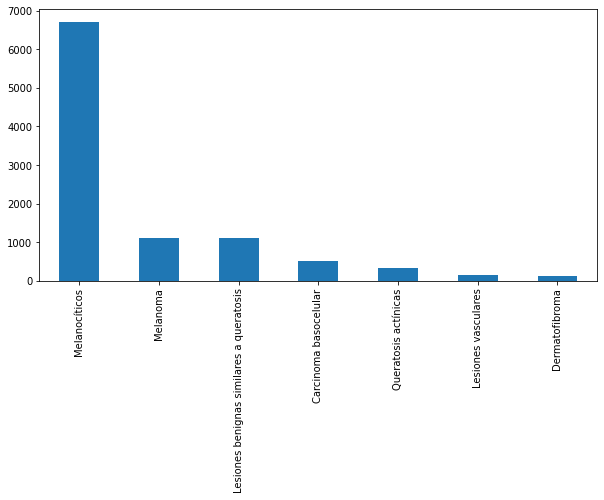

In [0]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
piel_df['cell_type'].value_counts().plot(kind='bar', ax=ax1)

En esta gráfica podemos ver la distribución de los distintos tipos de lesiones cutáneas en función de la cantidad de imágenes de cada una de ellas. 

Por otra parte, la columna **dx_type** nos indica el tipo de validación técnica de cada imagen y podemos observar 4 categorías en este campo:
1. Histopatología (Histo): diagnóstico por histopatología.
2. Confocal (Confocal): diagnóstico por microscopía confocal.
3. Seguimiento (Follow_up): Solo los nevos monitoreados por dermatoscopia digital que no mostraron ningún cambio durante 3 visitas de seguimiento o durante 1 año y medio, los biólogos aceptaron esto como evidencia de benignidad biológica.
4. Consenso (Consensus): diagnóstico por consenso de expertos.


- Distribución de tipos de diagnóstico.

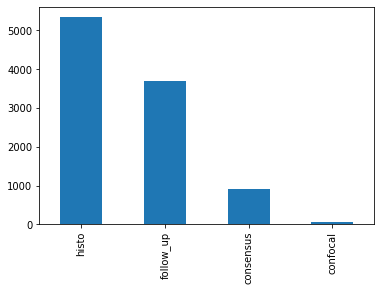

In [0]:
piel_df['dx_type'].value_counts().plot(kind='bar')

Podemos ver como la mayoría de los diagnósticos de cáncer de piel proceden de histologías.

- Distribución del campo de localización de las lesiones cutáneas.

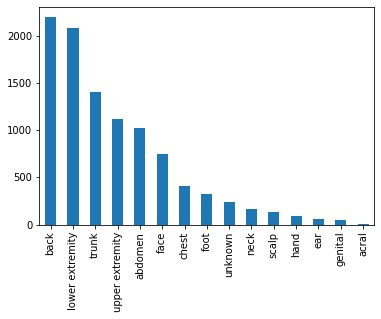

In [0]:
piel_df['localization'].value_counts().plot(kind='bar')

La espalda, la extremidad inferior, el tronco y la extremidad superior son regiones muy comprometidas de cáncer de piel.

- Distribución del campo de la edad.

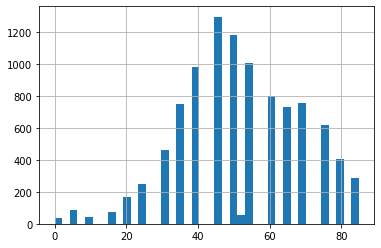

In [0]:
piel_df['age'].hist(bins=40)

Parece que hay casos más grandes de pacientes que tienen entre 30 y 60 años.

- Distribución de sexo.

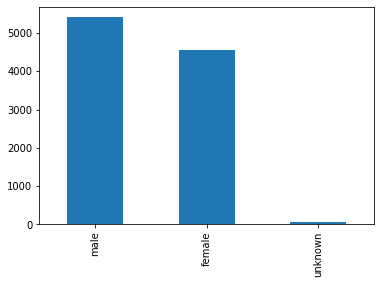

In [0]:
piel_df['sex'].value_counts().plot(kind='bar')

La proporción de hombres con cáncer de piel es mayor que la proporción en mujeres.

# **5. Redimensionamiento de imágenes**


Redimensionamos las imágenes, ya que la dimensión original de las imágenes es de 450 x 600 x 3 (altura x anchura x profundidad), medidas que TensorFlow no puede manejar, por eso cambiamos el tamaño a 100 x 75 (anchura x altura). Las imágenes se cargarán en una nueva columna que llamaremos "image".

In [0]:
#redimensionamos todas las imágenes
piel_df['image'] = piel_df['path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

Observo la nueva columna.

In [0]:
piel_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/drive/My Drive/tfg/TFGGG/HAM10000_ima...,Lesiones benignas similares a queratosis,2,"[[[190, 153, 194], [192, 154, 196], [191, 153,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/drive/My Drive/tfg/TFGGG/HAM10000_ima...,Lesiones benignas similares a queratosis,2,"[[[23, 13, 22], [24, 14, 24], [25, 14, 28], [3..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/drive/My Drive/tfg/TFGGG/HAM10000_ima...,Lesiones benignas similares a queratosis,2,"[[[185, 127, 137], [189, 133, 147], [194, 136,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/drive/My Drive/tfg/TFGGG/HAM10000_ima...,Lesiones benignas similares a queratosis,2,"[[[24, 11, 17], [26, 13, 22], [38, 21, 32], [5..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/drive/My Drive/tfg/TFGGG/HAM10000_ima...,Lesiones benignas similares a queratosis,2,"[[[134, 90, 113], [147, 102, 125], [159, 115, ..."


Como podemos ver, la columna de imagen se ha agregado en su código de formato de color. A continación, enseñamos una muestra de 5 imégenes por cada tipo de lesión para poder visualizar el redimensionamiento.



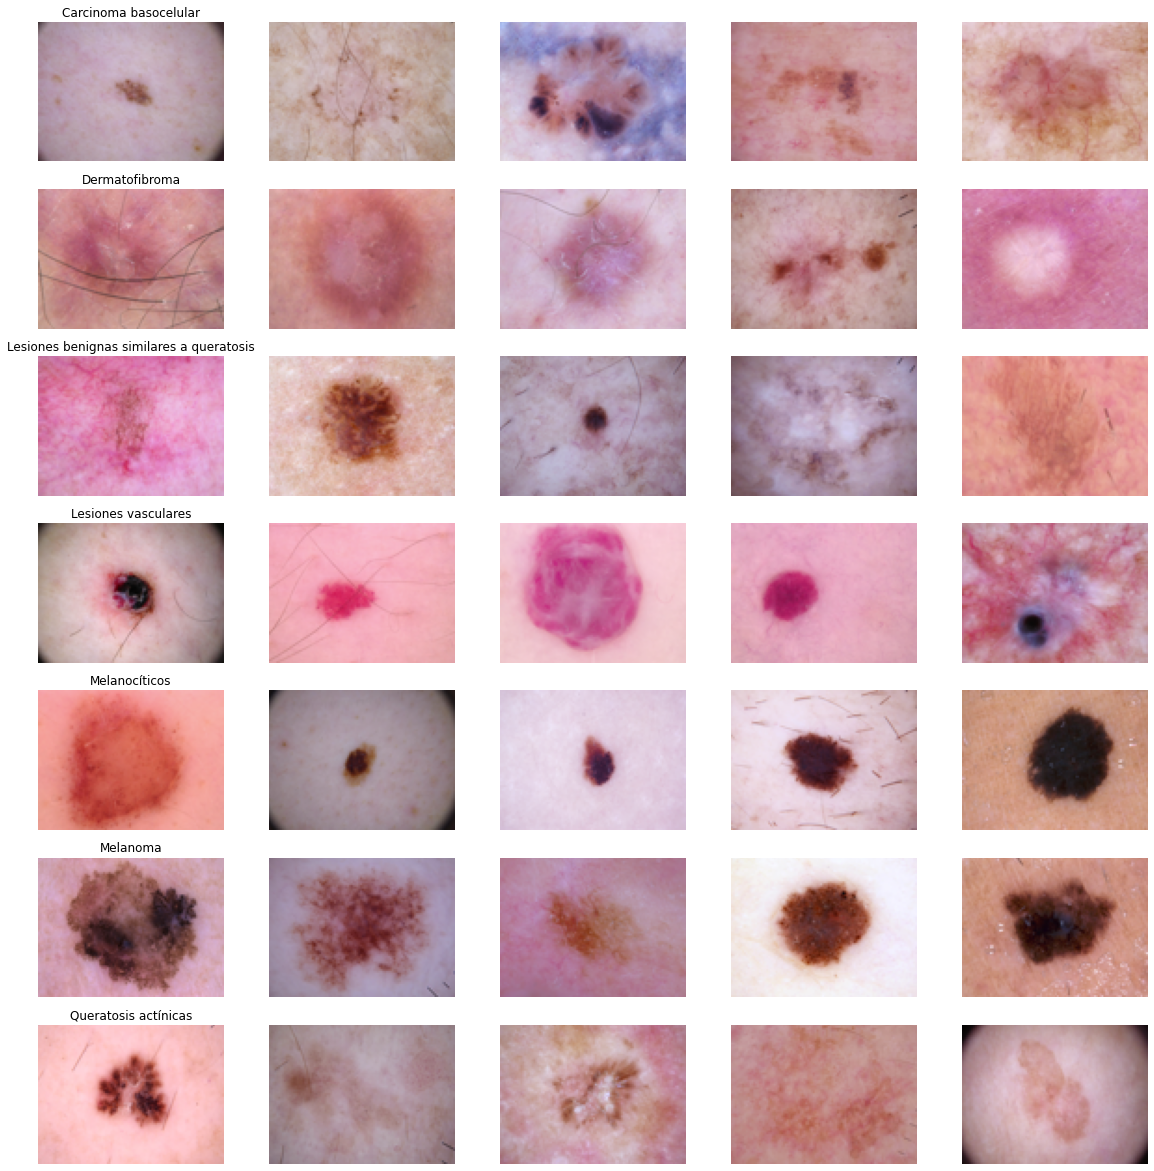

In [0]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         piel_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('lesionescutaneas.png', dpi=300)

Comprobamos la distribución del tamaño de la imagen.

In [0]:
piel_df['image'].map(lambda x: x.shape).value_counts()

(75, 100, 3)    10015
Name: image, dtype: int64

De esta manera, verificamos que nuestras imágenes tienen un dimensión de 75 x 100 x 3 (altura x anchura x profundidad) y que tenemos un total de 10015 imágenes.

Trabajaremos con los datos de tipo entero, los recogidos en la columna **cell_type_idx**, donde recogemos las características (features) y sus respectivos objetivos (target).

In [0]:
features=piel_df.drop(columns=['cell_type_idx'],axis=1)
target=piel_df['cell_type_idx']

# **6. ENTRENAMIENTO** 

Antes de proceder a entrenar nuestras convnets, debemos dividir nuestro conjunto de datos en 3 subconjuntos: entrenamiento, test y validación.

- Dividimos el conjunto de datos en entrenamiento y test. El argumento test_size indicará la proporción del conjunto de prueba (test), por ejemplo, si queremos el 80% de datos sean de entrenamiento y un 20% de test, pondremos en test_size = 0.20.

In [0]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.20,random_state=1234)

- Normalización.

Normalizamos x_train, x_test restando sus valores medios y dividiendo entre su desviación estándar.

In [0]:
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

Como se trata de una clasificación multiclase (7 clases diferentes) que identificamos con números del 0 al 6, tenemos que codificar estas clases en un vector one-hot.

In [0]:
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)

A contuación, divido el conjunto de entrenamiento en dos partes: entrenamiento y validación. Este último se encargará de evaluar el modelo.
La proporción del conjunto de validación la especificamos con el argumento test_size, como se hizo anteriormente para el conjunto test.

In [0]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.30, random_state = 2)

Por último, reformamos las imágenes de cada conjunto en un vector.

In [0]:
x_train = x_train.reshape(x_train.shape[0], *(75, 100, 3))
x_test = x_test.reshape(x_test.shape[0], *(75, 100, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(75, 100, 3))

Definimos el diseño de gráfica que vamos a utilizar para visualizar la precisión de nuestros modelos.

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

## **6.1 MODELO 1 : CONVNET SENCILLA SIN AUMENTO DE DATOS.**



*   Arquitectura del modelo 1.

El primer argumento de la **capa convolucional** (Conv2D) hace referencia al conjunto de filtros que la capa puede aprender. Se establecen 32 filtros para la primera capa conv2D y 64 filtros para la segunda. Estos filtros pueden verse como una transformación de la imagen.

De cada capa salen una serie de características aprendidas llamado "mapa de características".

La segunda capa importante es la **capa de reducción** (MaxPool2D). Esta capa simplemente actúa como un filtro de disminución de resolución. Mira a los 2 píxeles vecinos y selecciona el valor máximo. Estos se utilizan para reducir el coste computacional y, en cierta medida, también reducen el sobreajuste. 

Combinando capas convolucionales y de agrupamiento, la red creada puede combinar características locales y aprender más características globales de la imagen.

La **activación 'relu'** de las capas se utiliza para no agregar linealidad a la red creada. 

La **capa Flatten** se usa para convertir los mapas de salida finales en un solo vector 1D. Este paso de aplanamiento es necesario para que pueda utilizar capas completamente conectadas después de algunas capas convolucionales / maxpool. Combina todas las características locales encontradas de las capas convolucionales anteriores.

Las **capas Dropout** son usadas para combatir el sobreajuste del modelo. Desactivan de forma aleatoria características de salida de la capa durante el entrenamiento, de forma que reduce los patrones de casualidad que no son significativos.

El **clasificador Softmax** de la última capa calcula la evidencia de pertenecer a una clase en concreto y lo convierte en probabilidad.





In [0]:
input_shape = (75, 100, 3)
num_classes = 7

model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))



*   Seguimiento de cómo cambian las dimensiones de 
los mapas de características en la sucesión de las capas.

Vemos cómo se reducen las dimensiones de los mapas de características de 35 x 48 (altura por anchura) a 9x12 (altura por anchura).





In [0]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 73, 98, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 35, 48, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 35, 48, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 107520)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               13762688  
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

A continuación, hablaremos de las métricas utilizadas para entrenar nuestros modelos y que pasamos conmo argumentos al compilar.


*   **Optimizador**
El algoritmo de descenso de gradiente utilizado como optimizador es el algoritmo Adam, el cual adapta la tasa de aprendizaje ("learning rate") de la red en función de la distribución de los pesos, de forma que si estos están muy dispersos aumentará la tasa de aprendizaje.

*   **Precisión** 
La precisón o "accuracy" será la métrica de evaluación para la clasificación y se basa en el porcentaje total de elementos clasificados correctamente.

*   **Función de pérdida**
La función de pérdida o "loss" elegida es la entropía cruzada ("categorical_crossentropy"), utilizada para que las predicciones obtenidas estén más cerca de los valores reales. 







In [0]:
model1.compile(optimizer= optimizers.adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Finalmente, se ajusta el modelo en x_train, y_train y se especifica el número de épocas y el tamaño de lote.

In [0]:
batch_size = 12
epochs = 50

history1 = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 6409 samples, validate on 2003 samples
Epoch 1/50
6409/6409 [==============================] - 7s 1ms/step - loss: 1.0277 - accuracy: 0.6628 - val_loss: 0.8445 - val_accuracy: 0.6810
Epoch 2/50
6409/6409 [==============================] - 7s 1ms/step - loss: 0.8860 - accuracy: 0.6858 - val_loss: 0.8013 - val_accuracy: 0.7074
Epoch 3/50
6409/6409 [==============================] - 7s 1ms/step - loss: 0.8255 - accuracy: 0.7034 - val_loss: 0.8069 - val_accuracy: 0.6895
Epoch 4/50
6409/6409 [==============================] - 7s 1ms/step - loss: 0.7803 - accuracy: 0.7140 - val_loss: 0.7787 - val_accuracy: 0.7164
Epoch 5/50
6409/6409 [==============================] - 7s 1ms/step - loss: 0.7332 - accuracy: 0.7369 - val_loss: 0.7480 - val_accuracy: 0.7174
Epoch 6/50
6409/6409 [==============================] - 7s 1ms/step - loss: 0.6891 - accuracy: 0.7474 - val_loss: 0.7223 - val_accuracy: 0.7249
Epoch 7/50
6409/6409 [==============================] - 7s 1ms/step - loss: 0.6484 - acc

Evaluamos con el conjunto de prueba y validación.

In [0]:
loss, accuracy = model1.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model1.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model1.save("modelo1.h5")

1603/1603 [==============================] - 0s 247us/step
Validation: accuracy = 0.742982  ;  loss_v = 1.857040
Test: accuracy = 0.732901  ;  loss = 1.739351


Visualizamos la precisión y périda obtenidas en los dos conjuntos.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


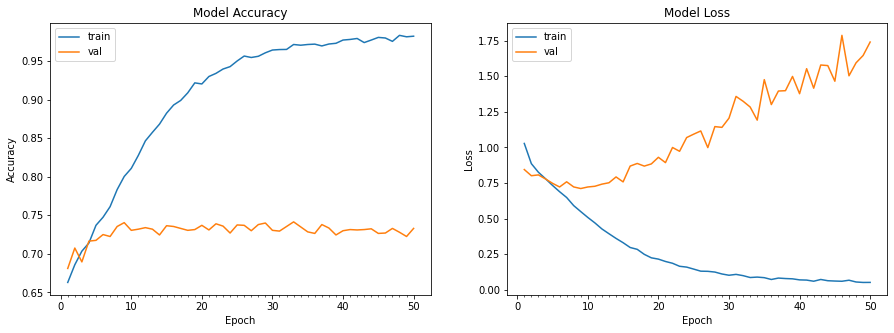

In [0]:
plot_model_history(history1)

Estos gráficos son características del sobreajuste. Vemos como la exactitud del entrenamiento aumenta con el tiempo hasta que alcanza casi el 100%, mientras que la exactitud de la validación se estanca en el 74%.

Por otro parte, la pérdida de validación aumenta linealmente hasta pasadas las 40 repeticiones donde observamos una caída y vuelve a aumentar, mientras que la pérdida de entrenamiendo se reduce hasta alcanzar casi el cero.


Además, visualizaremos los resultados a través de una matriz de confusión. Esta nos indica las predicciones correctas hechas entre el número total de predicciones. 

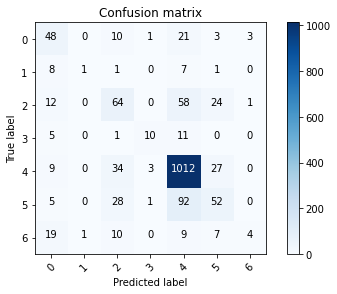

In [0]:
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model1.predict(x_validate)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
# compute the confusion matrix
confusion_mtx1 = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx1, classes = range(7))    

Para interpretar la matriz de confusión y saber el total de elementos clasificados correctamente, debemos saber que las columnas representan las predicciones hechas de cada clase y las filas las instancias de la clase real. Vemos que el mayor número de predicciones bien hechas corresponden a la clase 4: queratosis actínica.


Finalmente, visualizamos qué categoría tiene más predicciones incorrectas.

Text(0, 0.5, 'Fraction classified incorrectly')

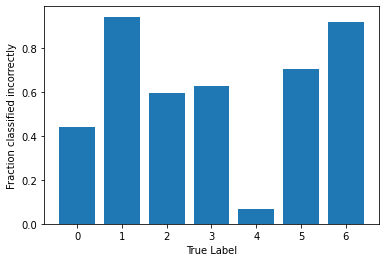

In [0]:
label_frac_error = 1 - np.diag(confusion_mtx1) / np.sum(confusion_mtx1, axis=1)
plt.bar(np.arange(7),label_frac_error)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

Podemos ver que la clase con más predicciones incorrectas es la representada por el número 1 : Melanoma. Es totalmente normal, ya que es la clase con más muestras de entrenamiento.

# **6.2 MODELO 2: CONVNET COMPLEJA CON AUMENTO DE DATOS.**

A continuación, vamos a aplicar distintas técnicas que nos pueden ayudar a reducir el sobreajuste creado en el modelo, como la adición de capas, el dropout y el aumento de datos (Data Augmentation). 



*   Arquitectura de la red.

En el diseño de este modelo aumentamos la complejidad de su arquitetura, formada por una mayor sucesión de capas convolucionales y MaxPooling alternas, de forma que conseguimos aumentar el tamaño de red y su capacidad. 
Además, añadimos más capas Dropout para suavizar el sobreajuste causado. 
En este modelo, aumentamos los filtros de los mapas de características de 32 a 128.



In [0]:
input_shape = (75, 100, 3)
num_classes = 7
model2 = Sequential()
model2.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=input_shape))
model2.add(Conv2D(32, 3, padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size = (2, 2)))
    #Capa Dropout
model2.add(Dropout(0.25))
model2.add(Conv2D(64, 3, padding='same', activation='relu', input_shape=input_shape))
model2.add(Conv2D(64, 3, padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
    #Capa Dropout
model2.add(Dropout(0.4))
    
model2.add(Conv2D(128, 3, padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
    #Capa Dropout
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
    #Capa Dropout
model2.add(Dropout(0.55))
model2.add(Dense(7, activation='softmax'))




*   Seguimiento de cómo cambian las dimensiones de los mapas de características en la sucesión de las capas.

Vemos cómo se reducen las dimensiones de los mapas de características de 75 x 100 (altura por anchura) a 9x12 (altura por anchura).




In [0]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 75, 100, 32)       896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 100, 32)       9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 50, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 25, 64)       

Compilamos el modelo.

In [0]:
model2.compile(optimizer=optimizers.adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Una función nueva con respecto al modelo anterior es la llamada "ReduceLROnPlateau", la cual reduce la tasa de aprendizaje si esta se estanca durante el entrenamiento.

In [0]:
from tensorflow.keras.callbacks import ReduceLROnPlateau 

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

El aumento de datos es un paso opcional y es una técnica para reducir el sobreajuste causado en la red. El objetivo del aumento de datos es alterar las imágenes de entrenamiento, por eso se le aplica al conjunto de datos de entrenamiento a través de la función fit (x_train). Al aplicar solo un par de estas transformaciones a nuestros datos de entrenamiento, podemos fácilmente duplicar o triplicar el número de ejemplos de entrenamiento y crear un modelo muy robusto. 

Las transformaciones elegidas para aplicar sobre las imágenes que tenemos son rotación, zoom, tralasción horizontal y traslación vertical.

Para poder hacer esto posible es necesario crear un generador con "ImageDataGenerator" y aplicarlo sobre el conjunto de entrenamiento.



In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range= 10,  #Rotación de 10 grados.
        zoom_range = 0.1, # Ampliar aleatoriamente la imagen 
        width_shift_range= 0.1,  # Cambiar aleatoriamente las imágenes horizontalmente (fracción del ancho total)
        height_shift_range= 0.1 ,  # Mover imágenes al azar verticalmente (fracción de la altura total)
        horizontal_flip=False,  
        vertical_flip=False)  
datagen.fit(x_train)

Como tenemos que usar el generador creado anteriormente, pasamos de usar la funciónn fit() para empezar el entrenamiento a usar fit_generator(). 

In [0]:
epochs = 100
batch_size = 64
history2 = model2.fit_generator(
    datagen.flow(x_train,y_train, batch_size=batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_validate,y_validate),
    validation_steps=x_validate.shape[0] // batch_size
    ,callbacks=[learning_rate_reduction]
)

Epoch 1/100
68/68 [==============================] - 15s 216ms/step - loss: 1.0761 - accuracy: 0.6635 - val_loss: 1.0023 - val_accuracy: 0.6722
Epoch 2/100
68/68 [==============================] - 9s 136ms/step - loss: 0.9503 - accuracy: 0.6679 - val_loss: 0.9066 - val_accuracy: 0.6708
Epoch 3/100
68/68 [==============================] - 9s 133ms/step - loss: 0.9186 - accuracy: 0.6697 - val_loss: 0.9161 - val_accuracy: 0.6736
Epoch 4/100
68/68 [==============================] - 9s 131ms/step - loss: 0.8864 - accuracy: 0.6796 - val_loss: 0.9394 - val_accuracy: 0.6974
Epoch 5/100
68/68 [==============================] - 9s 135ms/step - loss: 0.8757 - accuracy: 0.6773 - val_loss: 0.9607 - val_accuracy: 0.6952
Epoch 6/100
68/68 [==============================] - 9s 133ms/step - loss: 0.8574 - accuracy: 0.6831 - val_loss: 0.7980 - val_accuracy: 0.6972
Epoch 7/100
68/68 [==============================] - 9s 131ms/step - loss: 0.8423 - accuracy: 0.6856 - val_loss: 0.7809 - val_accuracy: 0.709

Evaluamos el modelo 2:

In [0]:
loss, accuracy = model2.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model2.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model2.save("modelo2.h5")


3606/3606 [==============================] - 1s 251us/step
Validation: accuracy = 0.767332  ;  loss_v = 0.631671
Test: accuracy = 0.759361  ;  loss = 0.643795


Visualizamos la precisión y pérdida de los conjuntos de entrenamiento y validación:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


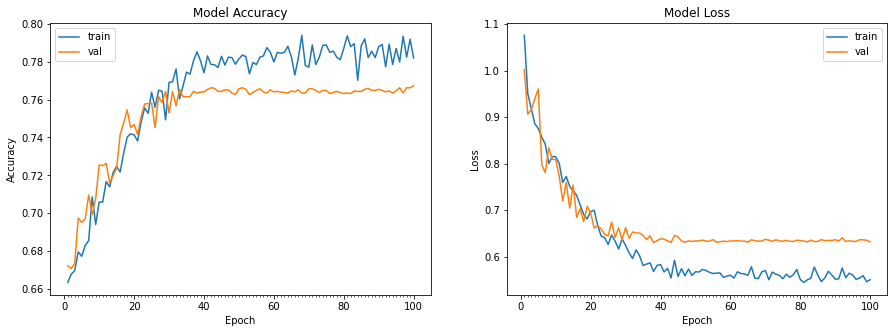

In [0]:
plot_model_history(history2)

Vemos como este modelo creado muestra un porcentaje de precisión superior al modelo 1 : 76 - 77 % y que, al pasar aproximandamente 40 épocas el modelo se estanca, por tanto se produce sobreajuste. 
Por otro parte, las pérdidas de validación y de entrenamiento se reducen considerablemente hasta que se produce el sobreajuste.

Visualizamos la matriz de confusión del modelo 2:

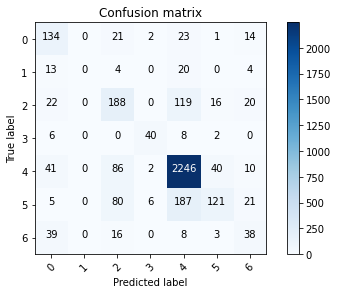

In [0]:
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model2.predict(x_validate)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
# compute the confusion matrix
confusion_mtx2 = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx2, classes = range(7))    

Al aumentar el conjunto de datos de entrenamiento, obtenemos un mayor número de predicciones correctas. Otra vez más, el mayor número de predicciones correctas se observan en la clase de queratosis actínica.

Veamos el número de predicciones incorrectas por cada clase:

Text(0, 0.5, 'Fraction classified incorrectly')

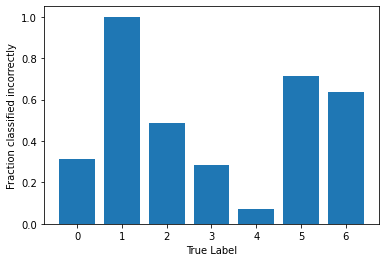

In [0]:
label_frac_error = 1 - np.diag(confusion_mtx2) / np.sum(confusion_mtx2, axis=1)
plt.bar(np.arange(7),label_frac_error)
plt.xlabel('True label')
plt.ylabel('Fraction classified incorrectly')

Podemos ver claramente que la clase representada por el dígito 1 (Melanoma) es la que presenta más clasificaciones incorrectas, que como se ha dicho antes, es la clase con mayor número de muestras de entrenamiento. 

## **6.3 MODELO 3: CON CONVNET PREENTRENADA (VGG16)**

Una red preenetrenada es una red que ya ha sido entrenada con anterioridad y ha sido guardada, por lo que puede actuar de forma genérica en múltiples problemas. En este caso, vamos a emplear la red VGG16, una red preentrenada sencilla y muy utilizada.



*   Instancia de la base convolucional VGG16.



In [0]:
vgg = VGG16(include_top=False, input_shape = (75,100,3), weights='imagenet')

58892288/58889256 [==============================] - 13s 0us/step




*   Arquitectura de la red VGG16 y seguimiento de cómo cambian las dimensiones de los mapas de características en la sucesión de las capas.

Podemos ver como pasan cómo se reducen las dimensiones de los mapas de características de 75 x 100 (altura por anchura) a 2x3 (altura por anchura).


In [0]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 75, 100, 3)        0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 100, 64)       1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 100, 64)       36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 25, 128)       0     

En primer lugar, aplicaremos la técnica de **extracción de características** que consiste en coger la base convolucional de la red preentrenada y entrenar un clasificador nuevo en su salida, de forma que genere datos nuevos a través de ellos. 

En general, se coge solo la base convolucional y no el clasificador densamente conectado, ya que es la primera la que contiene las representaciones aprendidas de carácter genérico, mientras que las del clasificador son conceptos más específicos.

Antes de llevar a cabo el proceso de aprendizaje es importante congelar la base convolucional para evitar que sus pesos se actualicen durante el entrenamiento y que no se modifiquen las representaciones aprendidas con anterioridad por esta red:

In [0]:
vgg.trainable = False #congelamos la red preentrenada

Añadimos el clasificador densamente conectado encima de la base convolucional:

In [0]:
input_shape = (75, 100, 3)
num_classes = 7
model3= Sequential()

model3.add(vgg)
model3.add(Flatten())
model3.add(Dense(256,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(7, activation='softmax'))

Observamos la sucesión de mapas de características:

In [0]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 3, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               786688    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 1799      
Total params: 15,503,175
Trainable params: 788,487
Non-trainable params: 14,714,688
_________________________________________________________________


Compilamos el modelo:

In [0]:
model3.compile(optimizer = optimizers.adam(lr=0.0001 ),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Creamos el generador de nuevos datos de entrenamiento:

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range= 10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  
        vertical_flip=False)  
        
datagen.fit(x_train)

Y la reducción de la tasa de aprendizaje:

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

Finalmente, entrenamos el modelo:

In [0]:
epochs = 100
batch_size = 64
history = model3.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_validate,y_validate),
    validation_steps=x_validate.shape[0] // batch_size
    ,callbacks=[learning_rate_reduction]
)

Epoch 1/100
87/87 [==============================] - 13s 144ms/step - loss: 1.1245 - accuracy: 0.6530 - val_loss: 0.8711 - val_accuracy: 0.6930
Epoch 2/100
87/87 [==============================] - 12s 139ms/step - loss: 0.8980 - accuracy: 0.6959 - val_loss: 0.8053 - val_accuracy: 0.7088
Epoch 3/100
87/87 [==============================] - 12s 136ms/step - loss: 0.8407 - accuracy: 0.7002 - val_loss: 0.7672 - val_accuracy: 0.7225
Epoch 4/100
87/87 [==============================] - 12s 139ms/step - loss: 0.8081 - accuracy: 0.7132 - val_loss: 0.7386 - val_accuracy: 0.7338
Epoch 5/100
87/87 [==============================] - 12s 137ms/step - loss: 0.7698 - accuracy: 0.7251 - val_loss: 0.7231 - val_accuracy: 0.7379
Epoch 6/100
87/87 [==============================] - 12s 137ms/step - loss: 0.7430 - accuracy: 0.7338 - val_loss: 0.7114 - val_accuracy: 0.7471
Epoch 7/100
87/87 [==============================] - 12s 137ms/step - loss: 0.7187 - accuracy: 0.7413 - val_loss: 0.7024 - val_accuracy:

Evaluamos:

In [0]:
loss, accuracy = model3.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model3.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model3.save("modelo3.h5")


2404/2404 [==============================] - 1s 596us/step
Validation: accuracy = 0.779950  ;  loss_v = 0.622477
Test: accuracy = 0.763355  ;  loss = 0.658418


Visualizamos las gráficas de precisión y pérdida de los conjunto de prueba y validación:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


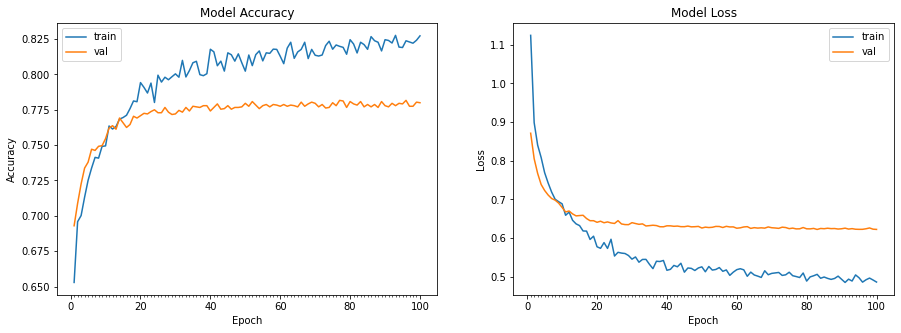

In [0]:
plot_model_history(history)

Con el modelo 3 aplicando la técnica de transfer learning de extracción de características obtenemos una precisión mayor que el modelo 2: 77-78 %.
Las pérdidas de entrenamiento y validación se reducen. 
Y, como podemos observar, el sobreajuste se produce aproximadamente en las 30-40 épocas, cuando las graficas se estancan. 

Matriz de confusión:

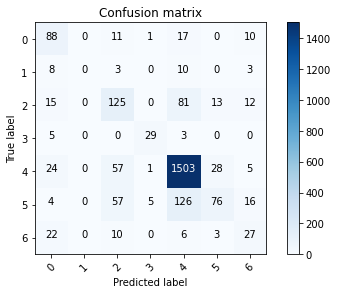

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model3.predict(x_validate)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

Aunque obtenemos un mayor porcentaje de precisión con respecto al modelo 2, la totalidad de las predicciones hechas correctamente es menor que el modelo anterior.

Predicciones incorrectas:

Text(0, 0.5, 'Fraction classified incorrectly')

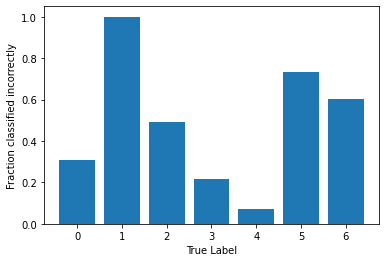

In [0]:
label_frac_error = 1 - np.diag(confusion_mtx) / np.sum(confusion_mtx, axis=1)
plt.bar(np.arange(7),label_frac_error)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

A continuación, aplicamos otra técnica de transfer learning: **ajuste fino**. Consiste en descongelar algunas de las capas superiores de la base de modelo congelada utilizada para la extracción de características y entrenar de manera conjunta la parte recién añadida del modelo y estas capas superiores. Lo vamos a hacer para las 2 y 3 últimas capas de la base covolucional.

Primero, vamos realizar un ajuste fino de las 3 últimas capas convolucionales, lo que significa que todas las capas hasta block4_pool deberían congelarse y las capas block5_conv1, block_conv2 y block_conv3 deberían poder entrenarse. 

Descongelamos la base convolucional:
 

In [0]:
vgg.trainable = True

Congelamos todas las capas hasta la primera del bloque 5 (descongelamos las 3 últimas capas).

In [0]:
set_trainable = False
for layer in vgg.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False
  

Compilamos el nuevo modelo:

In [0]:
model3.compile(optimizer = optimizers.adam(lr=0.0001 ),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Entrenamos:

In [0]:
epochs = 100
batch_size = 64
history = model3.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_validate,y_validate),
    validation_steps=x_validate.shape[0] // batch_size
    ,callbacks=[learning_rate_reduction]
)

Epoch 1/100
87/87 [==============================] - 12s 139ms/step - loss: 0.6475 - accuracy: 0.7637 - val_loss: 0.6436 - val_accuracy: 0.7587
Epoch 2/100
87/87 [==============================] - 12s 140ms/step - loss: 0.5345 - accuracy: 0.8000 - val_loss: 0.6543 - val_accuracy: 0.7775
Epoch 3/100
87/87 [==============================] - 12s 138ms/step - loss: 0.4673 - accuracy: 0.8223 - val_loss: 0.6877 - val_accuracy: 0.7816
Epoch 4/100
87/87 [==============================] - 12s 137ms/step - loss: 0.4137 - accuracy: 0.8427 - val_loss: 0.6038 - val_accuracy: 0.7933
Epoch 5/100
87/87 [==============================] - 12s 136ms/step - loss: 0.3656 - accuracy: 0.8658 - val_loss: 0.6635 - val_accuracy: 0.7879
Epoch 6/100
87/87 [==============================] - 11s 132ms/step - loss: 0.3281 - accuracy: 0.8819 - val_loss: 0.6315 - val_accuracy: 0.7966
Epoch 7/100
87/87 [==============================] - 12s 132ms/step - loss: 0.2849 - accuracy: 0.8916 - val_loss: 0.6707 - val_accuracy:

Evaluamos:

In [0]:
loss, accuracy = model3.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model3.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model3.save("modelo4.h5")


2404/2404 [==============================] - 1s 596us/step
Validation: accuracy = 0.806572  ;  loss_v = 1.285818
Test: accuracy = 0.794808  ;  loss = 1.434702


Visualizamos la pérdida y la precisión al aplicar el aajuste fino en las 3 últimas capas de la base convolucional:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


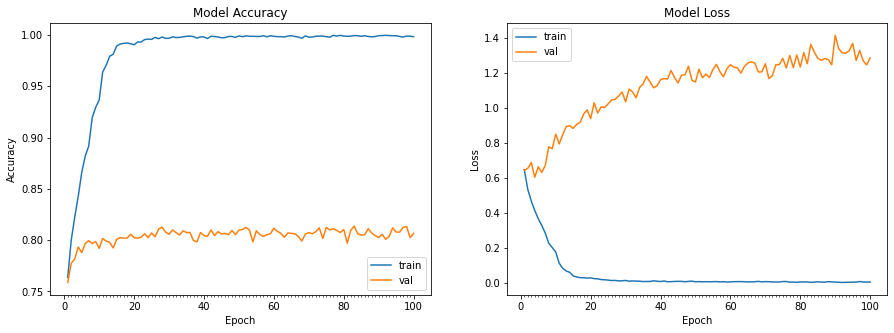

In [0]:
plot_model_history(history)

 La curva de exactitud de validación se ve mucho más limpia, viendo una mejora absoluta de la exactitud que alcanza el 79-80%. Sin embargo, la curva de pérdida no muestra ninguna mejora real. La respuesta es sencilla: lo que se muestra es una media de valores de pérdida punta a punto y lo que importa para la exactitud es la distribución de los valores de pérdida, no su media. 

Predicciones correctas:

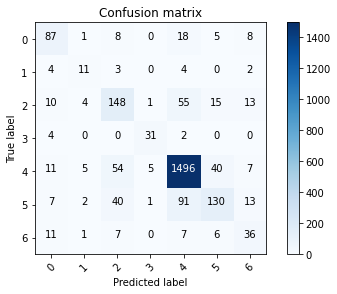

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model3.predict(x_validate)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7))

Predicciones incorrectas:

Text(0, 0.5, 'Fraction classified incorrectly')

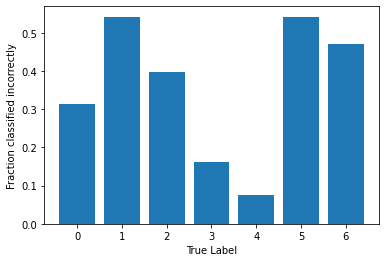

In [0]:
label_frac_error = 1 - np.diag(confusion_mtx) / np.sum(confusion_mtx, axis=1)
plt.bar(np.arange(7),label_frac_error)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

Primero, vamos realizar un ajuste fino de las 2 últimas capas convolucionales, lo que significa que todas las capas hasta block5_conv1 deberían congelarse y las capas block_conv2 y block_conv3 deberían poder entrenarse.

In [0]:
vgg.trainable = True

In [0]:
set_trainable = False
for layer in vgg.layers:
  if layer.name == 'block5_conv2':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

Compilamos:

In [0]:
model3.compile(optimizer = optimizers.adam(lr=0.0001 ),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Entrenamos:

In [0]:
epochs = 100
batch_size = 64
history = model3.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_validate,y_validate),
    validation_steps=x_validate.shape[0] // batch_size
    ,callbacks=[learning_rate_reduction]
)

Epoch 1/100
87/87 [==============================] - 12s 144ms/step - loss: 0.0207 - accuracy: 0.9922 - val_loss: 1.5658 - val_accuracy: 0.7999
Epoch 2/100
87/87 [==============================] - 12s 140ms/step - loss: 0.0197 - accuracy: 0.9940 - val_loss: 1.5272 - val_accuracy: 0.7829
Epoch 3/100
87/87 [==============================] - 12s 136ms/step - loss: 0.0386 - accuracy: 0.9888 - val_loss: 1.3206 - val_accuracy: 0.8003
Epoch 4/100
87/87 [==============================] - 12s 136ms/step - loss: 0.0234 - accuracy: 0.9928 - val_loss: 1.4650 - val_accuracy: 0.8074
Epoch 5/100
87/87 [==============================] - 12s 135ms/step - loss: 0.0162 - accuracy: 0.9935 - val_loss: 1.4129 - val_accuracy: 0.8078
Epoch 6/100
87/87 [==============================] - 12s 134ms/step - loss: 0.0184 - accuracy: 0.9944 - val_loss: 1.4390 - val_accuracy: 0.8012
Epoch 7/100
87/87 [==============================] - 12s 133ms/step - loss: 0.0252 - accuracy: 0.9908 - val_loss: 1.2575 - val_accuracy:

Evaluamos:

In [0]:
loss, accuracy = model3.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model3.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model3.save("modelo5.h5")

2404/2404 [==============================] - 1s 598us/step
Validation: accuracy = 0.809068  ;  loss_v = 1.837076
Test: accuracy = 0.805292  ;  loss = 2.045014


Visualizamos la pérdida y precisión:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


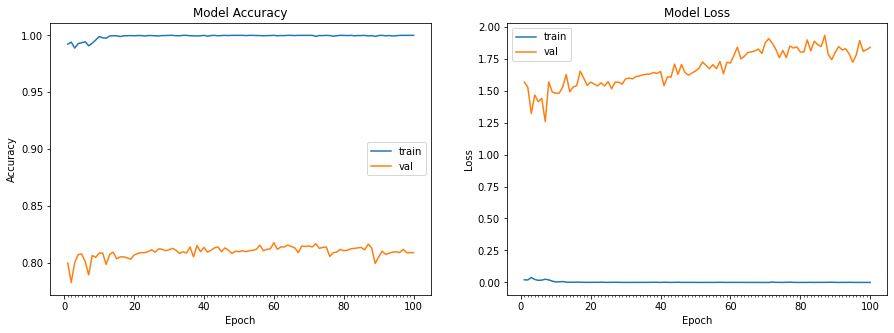

In [0]:
plot_model_history(history)

Conseguimos una precisión similar al anterior ajuste fino, un poco mejorada, aproximadamente de un 81-82%. En cuanto a la curva de pérdida no muestra ninguna mejora real como en el caso anterior

Predicciones correctas:

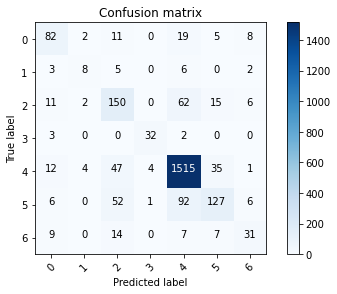

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model3.predict(x_validate)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7))

Predicciones incorrectas:

Text(0, 0.5, 'Fraction classified incorrectly')

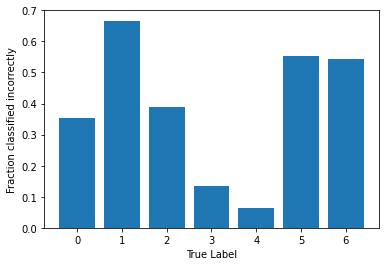

In [0]:
label_frac_error = 1 - np.diag(confusion_mtx) / np.sum(confusion_mtx, axis=1)
plt.bar(np.arange(7),label_frac_error)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')